In [14]:
import pandas as pd
import missingno as msno
import folium

# Load the datadriver_locations
df_order_requests = pd.read_csv('../data/driver_locations.csv')
df_completed_requests = pd.read_csv('../data/nb.csv')

## View basic statistics of both datasets

In [15]:
print(df_order_requests.describe())
print(df_order_requests.info())

                 id      order_id     driver_id           lat           lng  \
count  1.557740e+06  1.557740e+06  1.557740e+06  1.557740e+06  1.557740e+06   
mean   7.788705e+05  4.191833e+05  2.341505e+05  6.536031e+00  3.378877e+00   
std    4.496809e+05  1.444531e+04  2.270475e+04  5.998150e-02  5.333432e-02   
min    1.000000e+00  3.920010e+05  1.219810e+05  6.409333e+00  3.076561e+00   
25%    3.894358e+05  4.067650e+05  2.429970e+05  6.498694e+00  3.348810e+00   
50%    7.788705e+05  4.216870e+05  2.435890e+05  6.544247e+00  3.363504e+00   
75%    1.168305e+06  4.293130e+05  2.440560e+05  6.593276e+00  3.385177e+00   
max    1.557740e+06  5.179480e+05  2.478770e+05  7.702536e+00  8.515414e+00   

       created_at  updated_at  
count         0.0         0.0  
mean          NaN         NaN  
std           NaN         NaN  
min           NaN         NaN  
25%           NaN         NaN  
50%           NaN         NaN  
75%           NaN         NaN  
max           NaN         NaN  


In [16]:
print(df_completed_requests.describe())
print(df_completed_requests.info())

             TripID
count  5.360200e+05
mean   9.910221e+05
std    3.456364e+05
min    3.919960e+05
25%    6.935610e+05
50%    9.910085e+05
75%    1.281570e+06
max    1.637709e+06
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   TripID           536020 non-null  int64 
 1   TripOrigin       536020 non-null  object
 2   TripDestination  536020 non-null  object
 3   TripStartTime    534369 non-null  object
 4   TripEndTime      536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB
None


## Check for missing values on both datasets

In [10]:
missing_values_orders = df_order_requests.isnull().sum()
print(missing_values_orders)

id                     0
order_id               0
driver_id              0
driver_action          0
lat                    0
lng                    0
created_at       1557740
updated_at       1557740
dtype: int64


In [17]:
missing_values_completed = df_completed_requests.isnull().sum()
print(missing_values_completed)

TripID                0
TripOrigin            0
TripDestination       0
TripStartTime      1651
TripEndTime           1
dtype: int64


## Count of driver actions

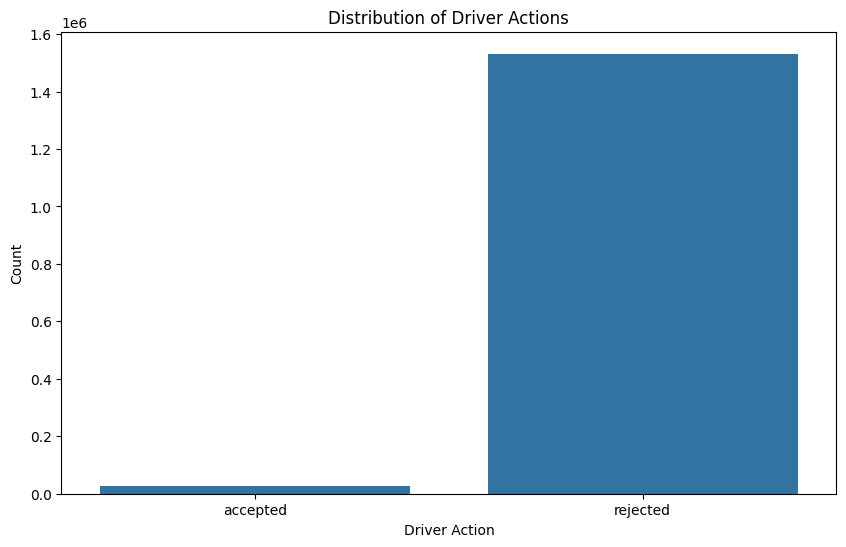

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='driver_action', data=df_order_requests)
plt.title('Distribution of Driver Actions')
plt.xlabel('Driver Action')
plt.ylabel('Count')
plt.show()

## Scatter plot - Geographical disrtibution of drivers' actions

/home/tewodros-cheru/Documents/Week8/gokada-logistic-optimization-causal-inference/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


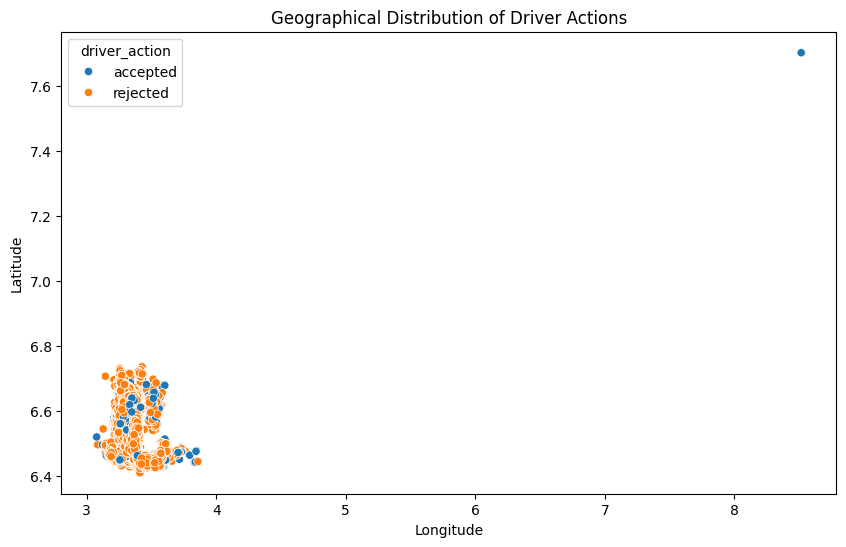

In [20]:
# Scatter plot of lat and lng
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lng', y='lat', hue='driver_action', data=df_order_requests)
plt.title('Geographical Distribution of Driver Actions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [24]:
# Convert Trip Start Time and Trip End Time to datetime
df_completed_requests['TripStartTime'] = pd.to_datetime(df_completed_requests['TripStartTime'])
df_completed_requests['TripEndTime'] = pd.to_datetime(df_completed_requests['TripEndTime'])

In [28]:
from geopy.distance import geodesic

# Split Trip Origin and Trip Destination into latitude and longitude
df_completed_requests[['origin_lat', 'origin_lng']] = df_completed_requests['TripOrigin'].str.split(',', expand=True).astype(float)
df_completed_requests[['dest_lat', 'dest_lng']] = df_completed_requests['TripDestination'].str.split(',', expand=True).astype(float)

# Ensure 'Trip StartTime' and 'Trip EndTime' columns are in datetime format
df_completed_requests['TripStartTime'] = pd.to_datetime(df_completed_requests['TripStartTime'])
df_completed_requests['TripEndTime'] = pd.to_datetime(df_completed_requests['TripEndTime'])

# Calculate trip duration in minutes
df_completed_requests['TripDuration'] = (df_completed_requests['TripEndTime'] - df_completed_requests['TripStartTime']).dt.total_seconds() / 60

# Calculate geodesic distance between origin and destination
df_completed_requests['Distance (km)'] = df_completed_requests.apply(lambda row: geodesic((row['origin_lat'], row['origin_lng']), (row['dest_lat'], row['dest_lng'])).kilometers, axis=1)

In [29]:
print(df_completed_requests.describe())
print(df_completed_requests.info())

             TripID                  TripStartTime  \
count  5.360200e+05                         534369   
mean   9.910221e+05  2021-10-02 10:24:45.446032896   
min    3.919960e+05            2021-07-01 06:21:02   
25%    6.935610e+05            2021-08-18 13:53:25   
50%    9.910085e+05            2021-10-05 11:27:22   
75%    1.281570e+06            2021-11-16 18:32:00   
max    1.637709e+06            2022-06-13 10:04:28   
std    3.456364e+05                            NaN   

                         TripEndTime     origin_lat     origin_lng  \
count                         536019  536020.000000  536020.000000   
mean   2021-10-02 15:06:34.897927424       6.530546       3.398546   
min              2021-07-01 07:02:23       1.000000       1.000000   
25%       2021-08-18 15:36:08.500000       6.451070       3.345118   
50%              2021-10-05 14:22:56       6.519874       3.375027   
75%       2021-11-17 11:59:15.500000       6.594755       3.457173   
max              2022-0

In [32]:
import pandas as pd

# Assuming df_completed_requests is your DataFrame

# Step 1: Ensure 'TripStartTime' is in datetime format
df_completed_requests['TripStartTime'] = pd.to_datetime(df_completed_requests['TripStartTime'])

# Step 2: Extract the hour, day of the week, and month
df_completed_requests['Start Hour'] = df_completed_requests['TripStartTime'].dt.hour
df_completed_requests['Start Day'] = df_completed_requests['TripStartTime'].dt.dayofweek  # Monday=0, Sunday=6
df_completed_requests['Start Month'] = df_completed_requests['TripStartTime'].dt.month

# Note: The 'dayofweek' attribute follows the Python standard where Monday=0 and Sunday=6.

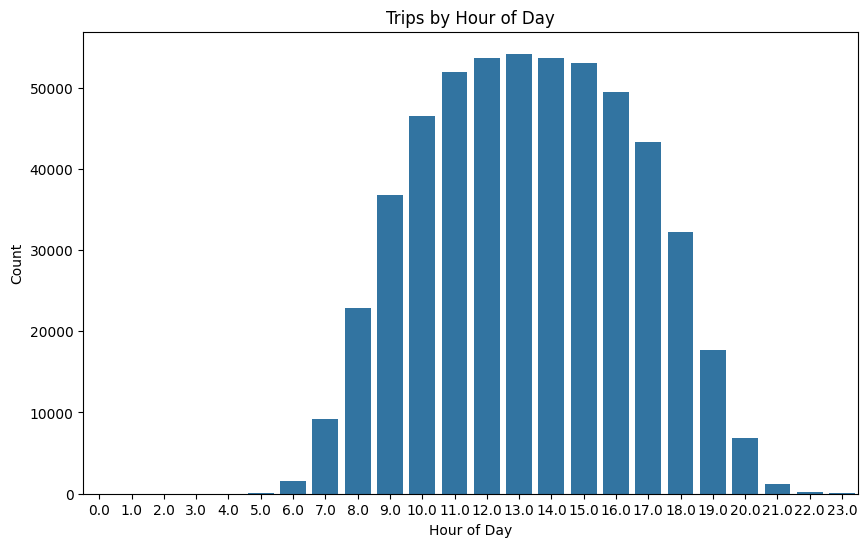

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Start Hour', data=df_completed_requests)  
plt.title('Trips by Hour of Day')
plt.xlabel('Hour of Day')  
plt.ylabel('Count')  
plt.show()

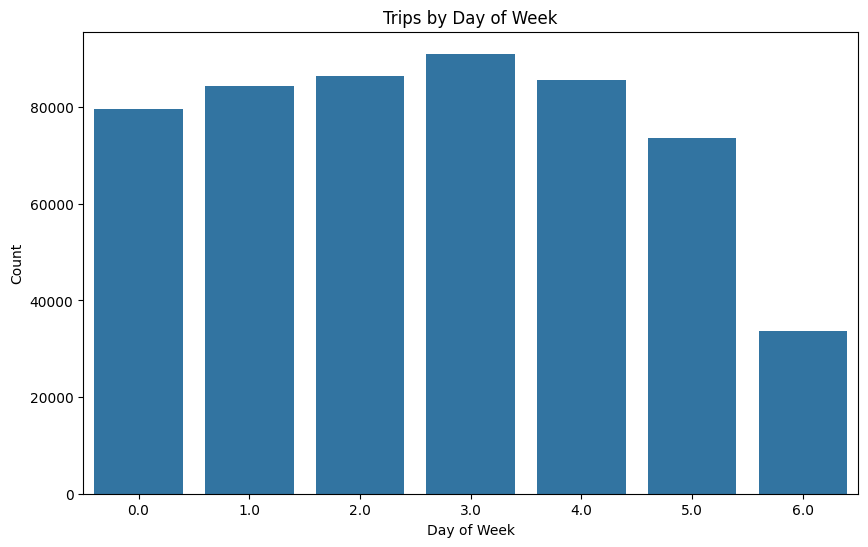

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Start Day', data=df_completed_requests)  
plt.title('Trips by Day of Week')
plt.xlabel('Day of Week')  
plt.ylabel('Count')  
plt.show()

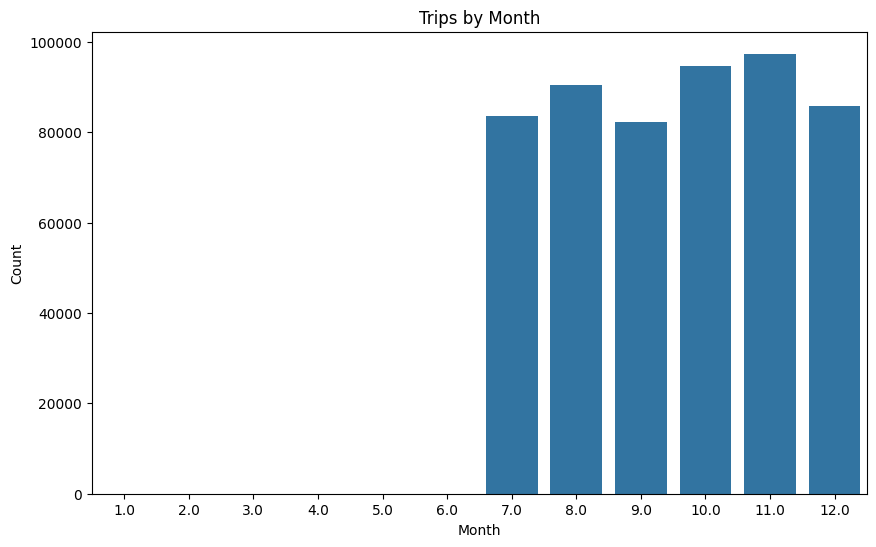

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Start Month', data=df_completed_requests)  
plt.title('Trips by Month')
plt.xlabel('Month')  
plt.ylabel('Count')  
plt.show()